In [1]:
import numpy as np
import matplotlib.pyplot  as plt

from numpy import genfromtxt

try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [2]:
with open('lit3rick_optim.pkl', 'rb') as fp:
    data = pickle.load(fp)
print(data.keys())

dict_keys(['t', (0, 0), (0, 50), (0, 100), (0, 150), (0, 200), (0, 250), (0, 300), (0, 350), (0, 400), (0, 450), (0, 500), (1, 0), (1, 50), (1, 100), (1, 150), (1, 200), (1, 250), (1, 300), (1, 350), (1, 400), (1, 450), (1, 500)])


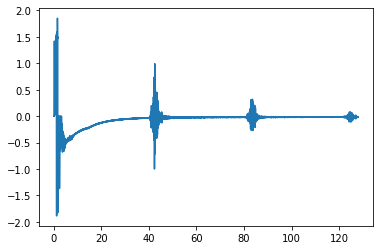

In [16]:
plt.plot(data["t"],data[1,200])

In [17]:
gain1={}
gain2={}
gain3={}

for hiloVal in [0,1]:
    for DAC in range(11):
        DAC = DAC*50
        gain1[hiloVal,DAC] = np.max(data[hiloVal,DAC][64*40:64*50]) - np.min(data[hiloVal,DAC][64*40:64*50])
        gain2[hiloVal,DAC] = np.max(data[hiloVal,DAC][64*80:64*90]) - np.min(data[hiloVal,DAC][64*80:64*90])
        gain3[hiloVal,DAC] = np.max(data[hiloVal,DAC][64*110:]) - np.min(data[hiloVal,DAC][64*110:])
        print(hiloVal,DAC,gain[hiloVal,DAC])

0 0 0.0087890625
0 50 0.0107421875
0 100 0.015625
0 150 0.029296875
0 200 0.05078125
0 250 0.0869140625
0 300 0.15234375
0 350 0.2587890625
0 400 0.419921875
0 450 0.6455078125
0 500 0.951171875
1 0 0.033203125
1 50 0.0400390625
1 100 0.0634765625
1 150 0.1103515625
1 200 0.19140625
1 250 0.3369140625
1 300 0.515625
1 350 0.681640625
1 400 1.001953125
1 450 1.6533203125
1 500 2.5380859375


## AD8331 

https://www.analog.com/en/products/ad8331.html#product-overview

Gain : 

* −4.5 dB to +43.5 dB in LO gain mode
* 7.5 dB to 55.5 dB in HI gain mode

41.29985011159623


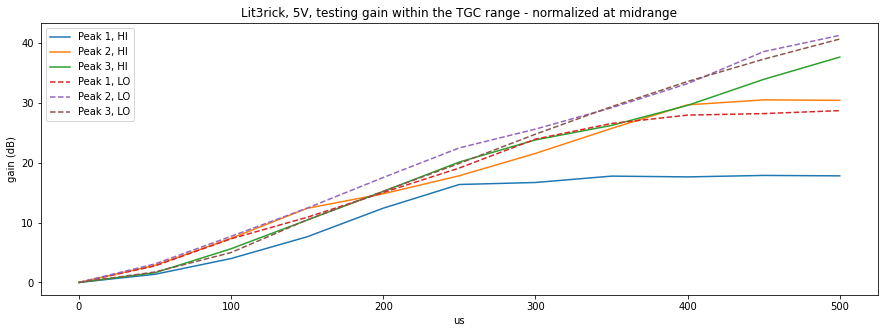

In [43]:
plt.figure(figsize=(15,5))

x = []

y1 = []
y2 = []
y3 = []

y11 = []
y12 = []
y13 = []

hiloVal = 1
for DAC in range(11):
    DAC = DAC*50
    x.append(DAC)
    y1.append(gain1[hiloVal,DAC])
    y2.append(gain2[hiloVal,DAC])
    y3.append(gain3[hiloVal,DAC])



hiloVal = 0
for DAC in range(11):
    DAC = DAC*50 
    y11.append(gain1[hiloVal,DAC])
    y12.append(gain2[hiloVal,DAC])
    y13.append(gain3[hiloVal,DAC])

y1 =  20.0*np.log10 ( np.array(y1) / y1[0] ) 
y2 =  20.0*np.log10 ( np.array(y2) / y2[0] ) 
y3 =  20.0*np.log10 ( np.array(y3) / y3[0] ) 
y11 = 20.0*np.log10 ( np.array(y11) / y11[0] ) 
y12 = 20.0*np.log10 ( np.array(y12) / y12[0] ) 
y13 = 20.0*np.log10 ( np.array(y13) / y13[0] ) 

#plt.plot(X,(Y),"x")

plt.plot(x,y1, linestyle='solid',label="Peak 1, HI")
plt.plot(x,y2, linestyle='solid',label="Peak 2, HI")
plt.plot(x,y3, linestyle='solid',label="Peak 3, HI")

plt.plot(x,y11, linestyle='dashed',label="Peak 1, LO")
plt.plot(x,y12, linestyle='dashed',label="Peak 2, LO")
plt.plot(x,y13, linestyle='dashed',label="Peak 3, LO")
#plt.yscale('log')


print(y12[-1]-y12[0])

plt.legend()
plt.xlabel('us')
plt.ylabel('gain (dB)')
plt.title("Lit3rick, 5V, testing gain within the TGC range - normalized at gain = 0")
plt.savefig("lit3_5V_gaintrends.jpg")

11.544728152058605
8.524946452447939


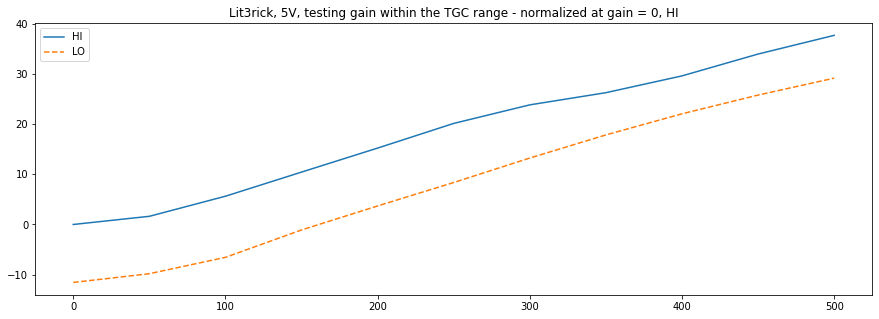

In [47]:
plt.figure(figsize=(15,5))

x = []

yH = []
yL = []

hiloVal = 1
for DAC in range(11):
    DAC = DAC*50
    x.append(DAC)
    yH.append(gain3[hiloVal,DAC])



hiloVal = 0
for DAC in range(11):
    DAC = DAC*50 
    yL.append(gain3[hiloVal,DAC])

ref = np.array(yH)[0]

yH = 20.0*np.log10 ( np.array(yH) / ref )  
yL = 20.0*np.log10 ( np.array(yL) / ref )  

#plt.plot(X,(Y),"x")

plt.plot(x,yH, linestyle='solid', label="HI")
plt.plot(x,yL, linestyle='dashed', label="LO")

#plt.yscale('log')


print(yH[0]-yL[0])
print(yH[-1]-yL[-1])

plt.legend()
plt.title("Lit3rick, 5V, testing gain within the TGC range - normalized at gain = 0, HI")
plt.savefig("lit3_5V_hilo.jpg")
plt.show()